In [1]:
import gzip
import pandas as pd
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
%cd "/content/drive/MyDrive/DSPM"

/content/drive/MyDrive/DSPM


In [5]:
import pandas as pd
import numpy as np
import re #regular expressions
# pip install -U spacy
# python -m spacy download en_core_web_sm
#pip install -U spacy && python -m spacy download en_core_web_sm
import spacy #natural language processing
import matplotlib.pyplot as plt
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
reviews = pd.read_json("top_prod_reviews.json",compression="gzip")
reviews.head()



,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
2543,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,Doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2544,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,Not pigmented enough. Needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2545,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,I really liked the color of this polish. It wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2546,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2547,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,Its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...


In [7]:
prod1= reviews[reviews['asin']=="B000142FVW"]
prod1.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
2543,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,Doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2544,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,Not pigmented enough. Needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2545,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,I really liked the color of this polish. It wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2546,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2547,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,Its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...


In [8]:
prod1['reviewText']= prod1['reviewText'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
#Tokenize the Data
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("color")
nlp.Defaults.stop_words.add("polish")
nlp.Defaults.stop_words.add("nails")
nlp.Defaults.stop_words.add("nail")
nlp.Defaults.stop_words.add("product")
nlp.Defaults.stop_words.add("products")

In [10]:
def remove_stopwords(text):
  '''
  Args

  text : a string of product review

  Return:

  tokens: a list of tokens without stopwords and punctutaions
  '''
  tokens=[]
  doc=nlp(text)
  for word in doc:
    if word.is_stop==False:
      if word.is_punct==False:
        if word.pos_=='ADJ' or word.pos_=="NOUN" or word.pos_=="VERB":
          tokens.append(word.text)
  sentence = " ".join(tokens)

  
  return sentence

In [11]:
prod1['reviewsTokens']=prod1['reviewText'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
prod1.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens
2543,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,match regular real suspect knick
2544,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,not pigmented enough. needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,pigmented needed coats beautiful elegant coats...
2545,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,i really liked the color of this polish. it wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,liked opaque having apply multiple coats thing...
2546,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"opi is the best quality polish i've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,best quality love bubble bath fan nude colors
2547,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,counterfeit


In [13]:
#what are the top 10 most frequent words

#split_it = [item for items in prod1['reviewsTokens'] for item in items]
#len(split_it)

split_it = []
for i in prod1['reviewsTokens']:
    split_it+=i.split()

len(split_it)

20776

In [14]:

text_top_counter= Counter(split_it)
text_top= []
text_top_counts= []
for k, v in text_top_counter.most_common(10):
    text_top.append(k)
    text_top_counts.append(v)
print(text_top)

['love', 'great', 'pink', 'beautiful', 'favorite', 'perfect', 'bottle', 'good', 'looks', 'nice']


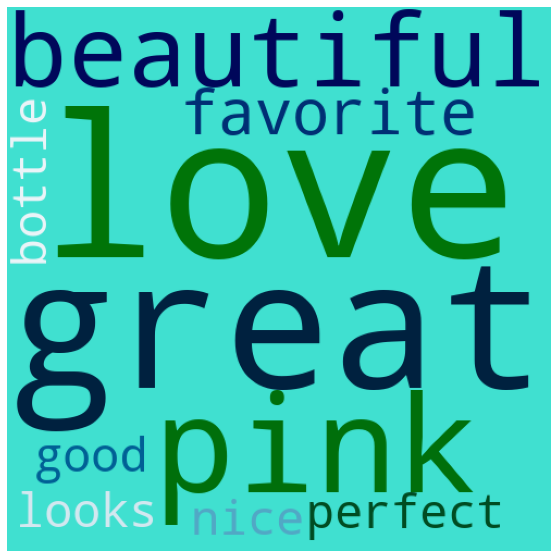

In [15]:
#Plot top 10 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plot_it = " ".join(text_top)
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(plot_it)
plot_cloud(wordcloud)

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 133kB 4.3MB/s 


In [ ]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    #print("Sentence Overall Rated As", end = " ") 
    
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.0 :
      result = "Positive"
      #print("Positive") 
  
    elif sentiment_dict['compound'] <  0.0 : 
      result = "Negative"
      #print("Negative") 
  
    #else : 
      #result = "Neutral"
      #print("Neutral") 
    return result

In [ ]:
prod1 = prod1.reset_index(drop=True)

In [ ]:
# add verdict
def result_token(df):
  lst=[]
  for i in df['reviewsTokens']:
    output = sentiment_scores(i)
    lst.append(output)
  df['Verdict'] = lst
  return df

In [ ]:
result_token(prod1)

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens,Verdict
0,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,match regular real suspect knick,Negative
1,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,not pigmented enough. needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,pigmented needed coats beautiful elegant coats...,Positive
2,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,i really liked the color of this polish. it wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,liked opaque having apply multiple coats thing...,Positive
3,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"opi is the best quality polish i've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,best quality love bubble bath fan nude colors,Positive
4,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,counterfeit,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,5,0,A2ZBLJ9IT7DNXS,B000142FVW,MrsGoe,absolutely in love with this color. it's a cro...,Beautiful color,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,love cross red pink saw similar woman son scho...,Positive
3047,5,0,A1OB07TVL4MD2D,B000142FVW,Lisa B,product as advertised,Five Stars,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,advertised,Positive
3048,5,0,A3VIAW0L3JHN48,B000142FVW,t g vt tg ttTGG gvtgtg,love the color. great transaction.,Five Stars,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,love great transaction,Positive
3049,5,0,A10SA56WLNSFAH,B000142FVW,Natalie,thank you for the swift delivery of this lovel...,I'm super pleased!,['Nail lacquer is the original n

In [ ]:
prod1.head(2)


,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens,Verdict
0,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,match regular real suspect knick,Negative
1,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,not pigmented enough. needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...,pigmented needed coats beautiful elegant coats...,Positive


In [ ]:
#choose 3 columns only

prod1 = prod1[['overall','reviewText','Verdict']]
#prod1 = prod1.reset_index(drop=True)
prod1.head(2)



,overall,reviewText,Verdict
0,1,doesnt match the regular color of the real pro...,Negative
1,3,not pigmented enough. needed three coats and s...,Positive


In [ ]:
#prod1['Verdict'] = np.where(prod1['Verdict'] == 'Positive', 1, 0)
# Tokens only 

change_nums = {"Verdict":     {"Positive": 1, "Negative": 0},
                "overall": {1: 0, 2: 0, 3: 0, 4: 1,5: 1}}
prod1 = prod1.replace(change_nums)
prod1.rename(columns = {'overall': 'sentiment','Verdict':'prediction'}, inplace = True)
prod1.head()



,sentiment,reviewText,prediction
0,0,doesnt match the regular color of the real pro...,0
1,0,not pigmented enough. needed three coats and s...,1
2,1,i really liked the color of this polish. it wa...,1
3,1,"opi is the best quality polish i've used, and ...",1
4,0,its counterfeit :/,1


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

Random Chances: ROC AUC=0.500
Product 1: ROC AUC= 0.641
Product 1: Accuracy= 0.847
Product 1: Precision= 0.842
Product 1: Recall= 0.993
Product 1: f1= 0.911


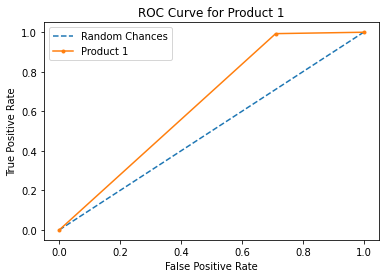

In [ ]:
# roc curve and auc

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(prod1['sentiment']))]

# calculate scores
ns_auc = roc_auc_score(prod1['sentiment'], ns_probs)
pro_1 = roc_auc_score(prod1['sentiment'], prod1['prediction'])
acc= accuracy_score(prod1['sentiment'],prod1['prediction'])
precision= precision_score(prod1['sentiment'],prod1['prediction'])
recall= recall_score(prod1['sentiment'],prod1['prediction'])
f1= f1_score(prod1['sentiment'],prod1['prediction'])


# summarize scores
print('Random Chances: ROC AUC=%.3f' % (ns_auc))
print('Product 1: ROC AUC= %.3f' % (pro_1))
print('Product 1: Accuracy= %.3f' % (acc))
print('Product 1: Precision= %.3f' % (precision))
print('Product 1: Recall= %.3f' % (recall))
print('Product 1: f1= %.3f' % (f1))



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(prod1['sentiment'], ns_probs)
one_fpr, one_tpr, _ = roc_curve(prod1['sentiment'], prod1['prediction'])


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances')
pyplot.plot(one_fpr, one_tpr, marker='.', label='Product 1')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("ROC Curve for Product 1")
# show the plot
pyplot.show()

In [ ]:
output_file = open("Prod1.txt", "w")
output_file.write("{:.2f}\n".format(acc))
output_file.write("{:.2f}\n".format(precision))
output_file.write("{:.2f}\n".format(recall))
output_file.write("{:.2f}".format(f1))
output_file.close()

In [ ]:
prod1.to_json('prod1_Vader_predictions.json',compression='gzip')